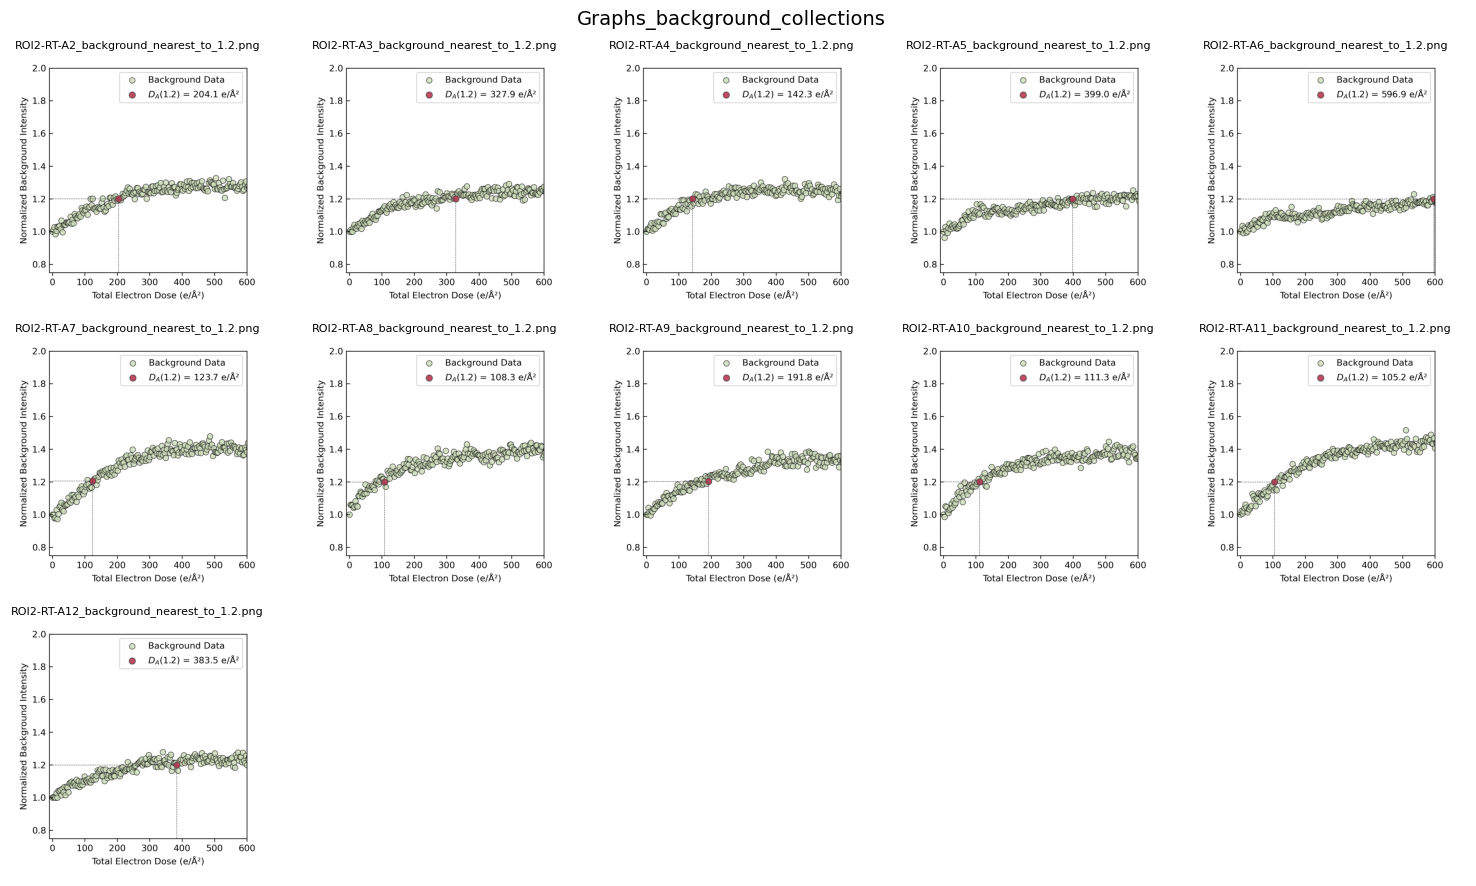

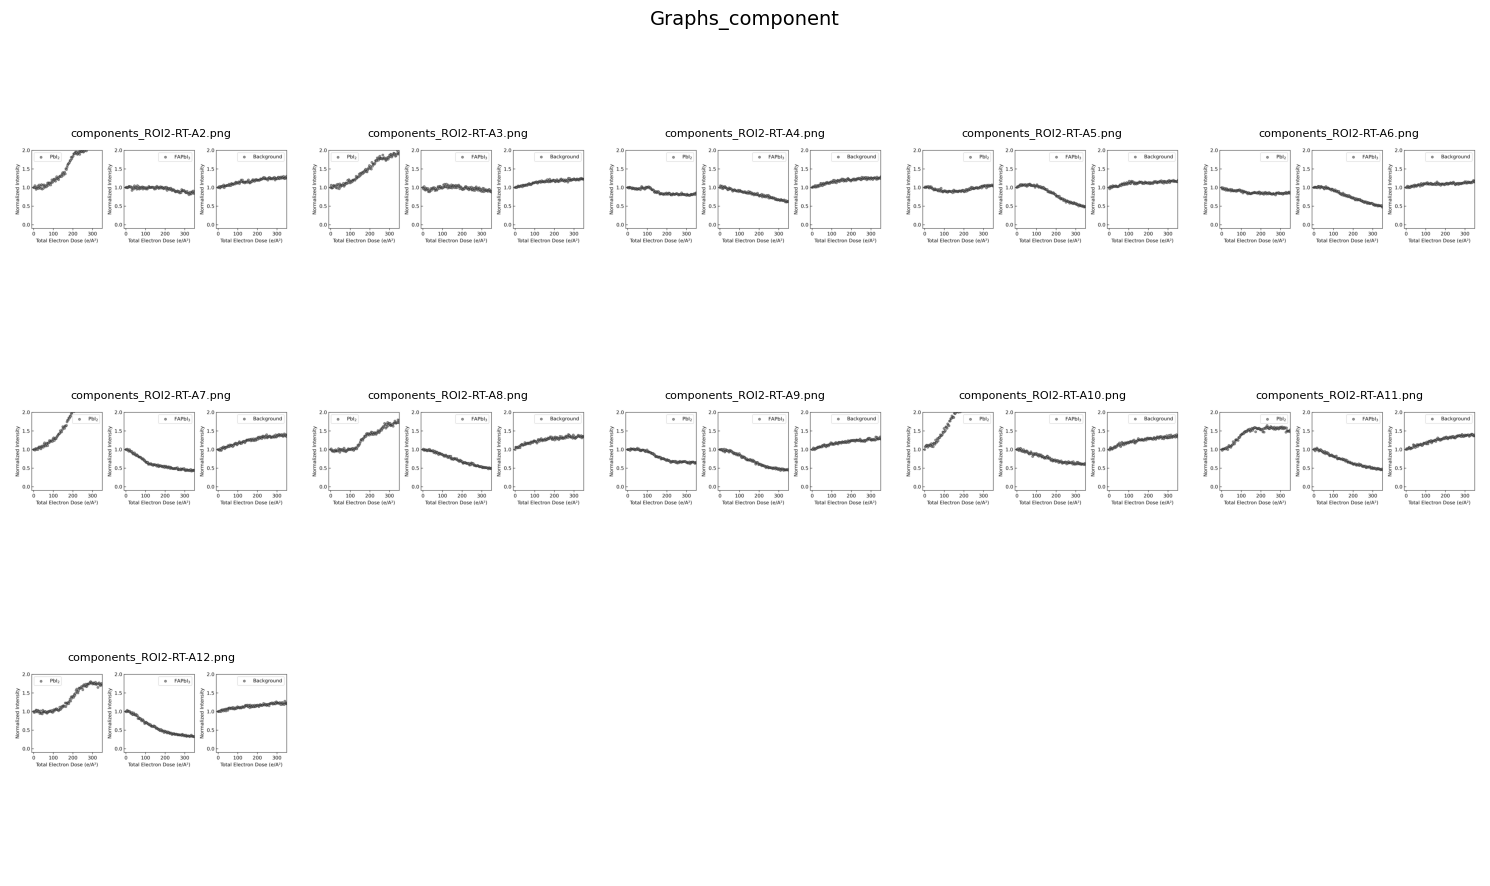

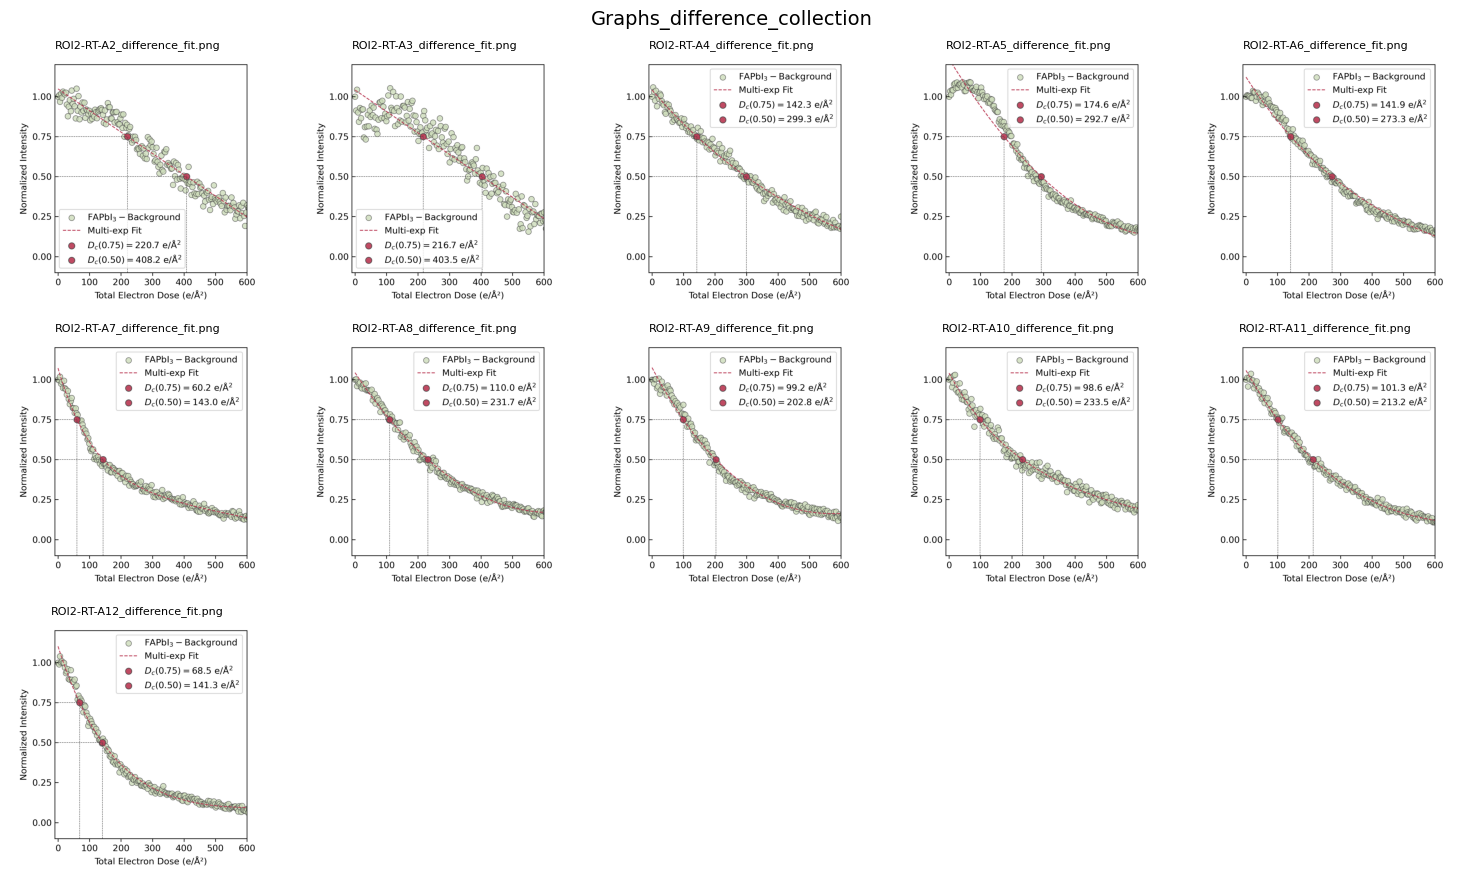

In [1]:
import os
import math
import re
from PIL import Image
import matplotlib.pyplot as plt

# 1) base path 설정 (현재 노트북 위치 기준)
base_dir = os.path.join(os.getcwd(), 'generated_notebooks')

# 2) 처리할 서브디렉터리 리스트
subdirs = [
    'Graphs_background_collections',
    'Graphs_component',
    'Graphs_difference_collection'
]

# 3) 각 폴더 순회하며 이미지 그리드로 표시
for sub in subdirs:
    img_dir = os.path.join(base_dir, sub)
    if not os.path.isdir(img_dir):
        print(f"⚠️ 폴더를 찾을 수 없어요: {img_dir}")
        continue

    # PNG 파일 목록 & A숫자 기준 정렬
    imgs = [f for f in os.listdir(img_dir) if f.lower().endswith('.png')]
    # 파일명에서 'A숫자' 추출해서 숫자 순 정렬
    def extract_num(fname):
        m = re.search(r'A(\d+)', fname)
        return int(m.group(1)) if m else float('inf')
    imgs = sorted(imgs, key=extract_num)

    n = len(imgs)
    if n == 0:
        print(f"⚠️ 이미지가 없어요: {img_dir}")
        continue

    # 그리드 크기: cols, rows 자동 계산
    cols = 5  # 한 행에 최대 5개
    rows = math.ceil(n / cols)

    # Figure & Axes 생성
    fig, axes = plt.subplots(rows, cols, figsize=(cols*3, rows*3))
    axes = axes.flatten()

    # 이미지 로드 & 플롯
    for ax, fname in zip(axes, imgs):
        path = os.path.join(img_dir, fname)
        im = Image.open(path)
        ax.imshow(im)
        ax.set_title(fname, fontsize=8)
        ax.axis('off')

    # 남는 서브플롯 숨기기
    for ax in axes[n:]:
        ax.axis('off')

    # 타이틀 및 레이아웃
    fig.suptitle(sub, fontsize=14)
    plt.tight_layout()
    plt.show()


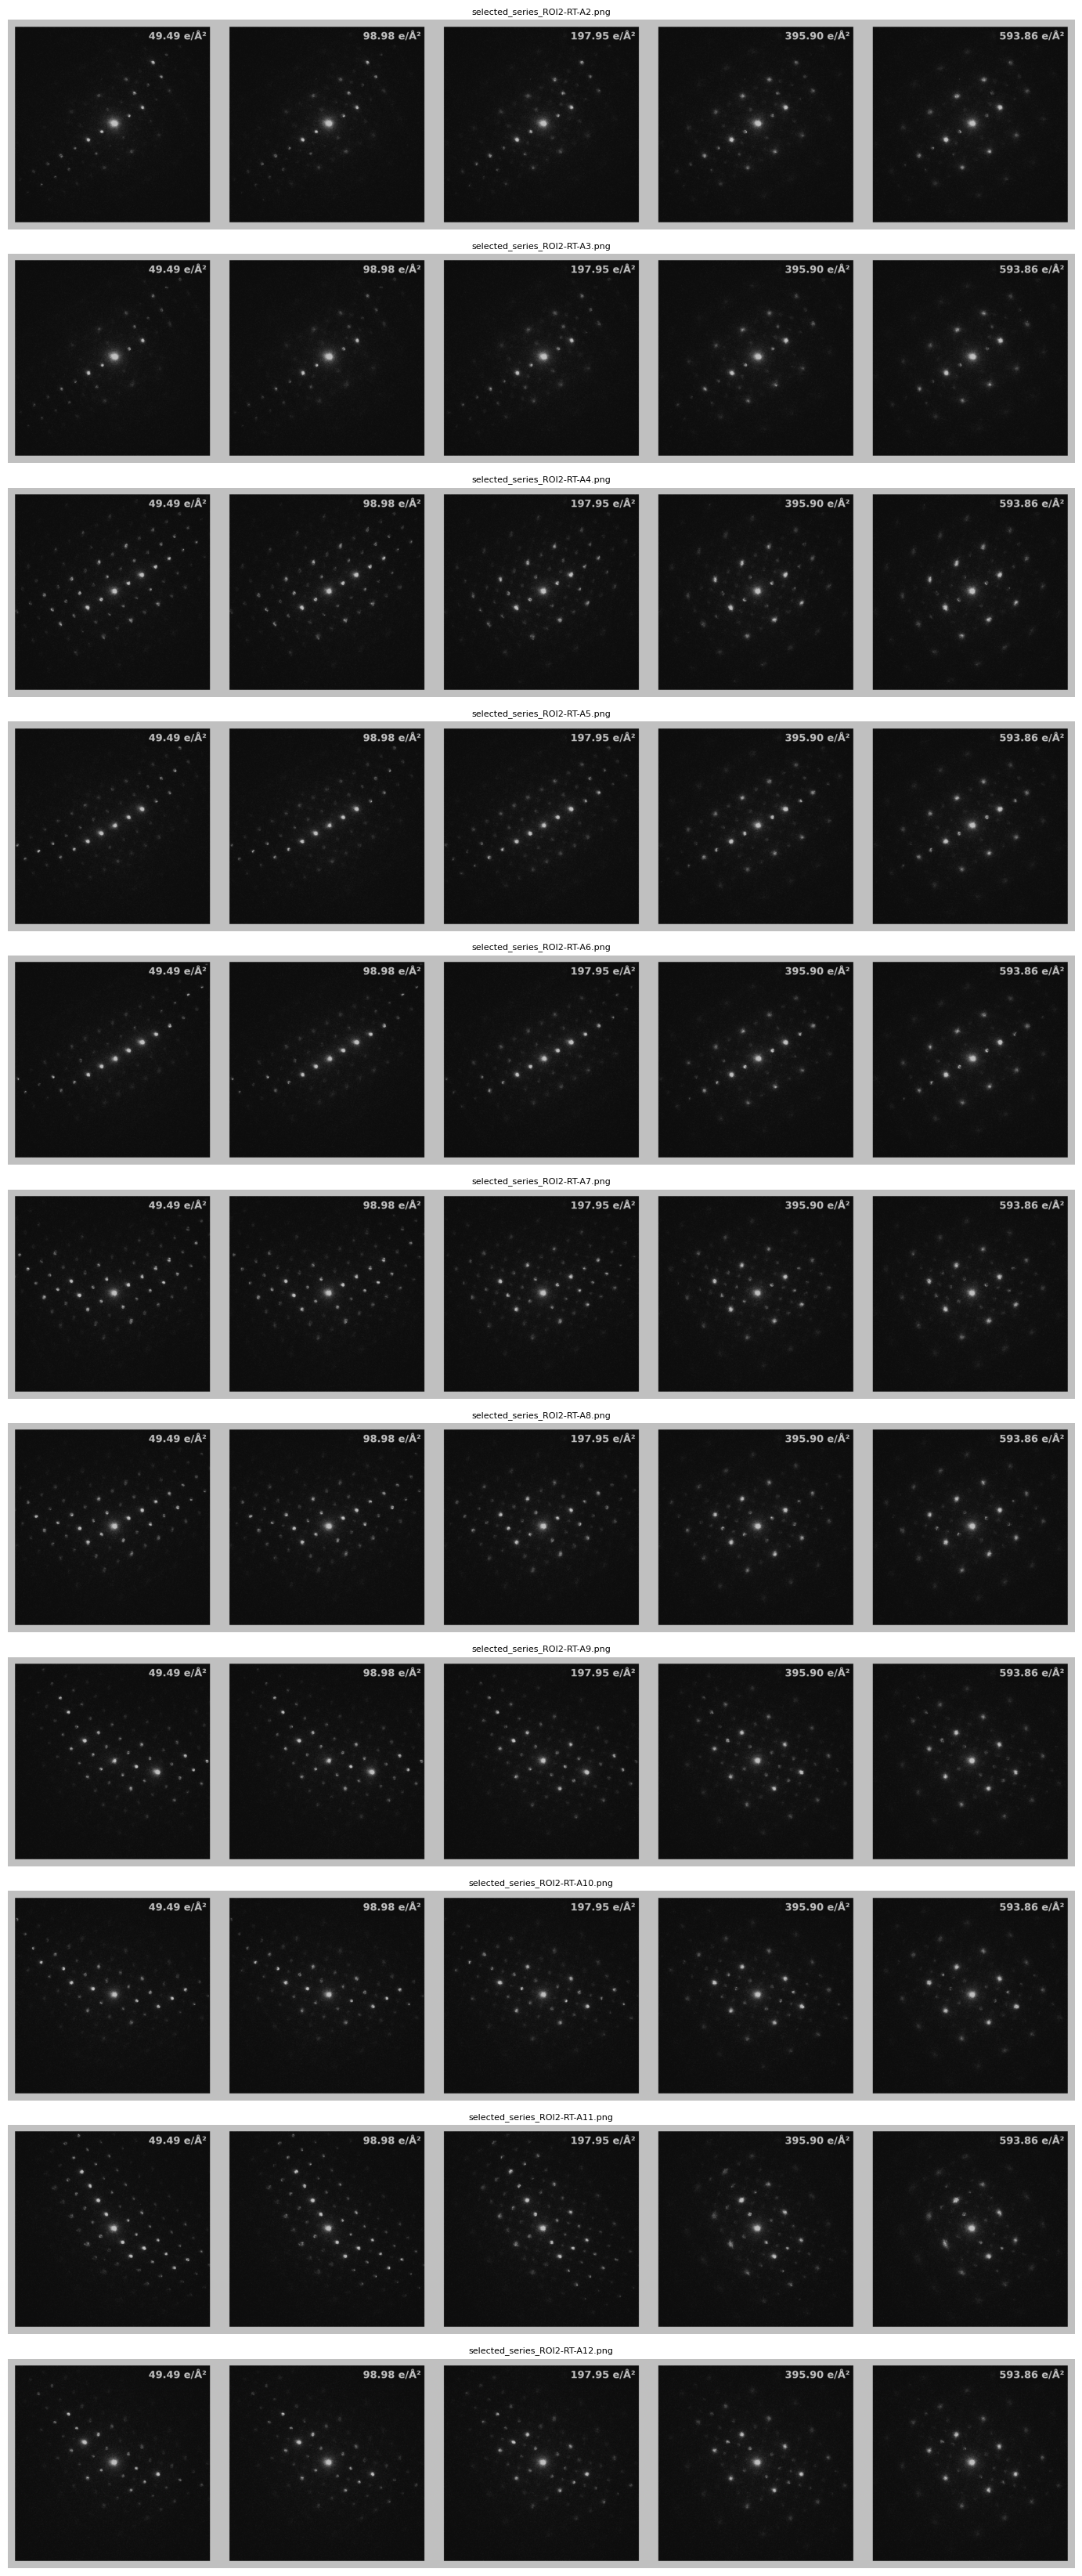

In [2]:
import os
import re
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt

# --- 설정: 밝기/대비 조절 계수 ---
brightness_factor = 1.3   # >1 밝아짐, <1 어두워짐
contrast_factor   = 0.7   # <1 대비 감소, >1 대비 증가

# base_dir 는 이전과 동일하게 설정
base_dir = os.path.join(os.getcwd(), 'generated_notebooks')
dp_dir   = os.path.join(base_dir, 'DP_diffraction_series')

# selected_series_*.png 만 골라서 A숫자 순 정렬
all_imgs = [f for f in os.listdir(dp_dir) if f.startswith('selected_series_') and f.endswith('.png')]
def extract_num(fname):
    m = re.search(r'A(\d+)', fname)
    return int(m.group(1)) if m else float('inf')
sel_imgs = sorted(all_imgs, key=extract_num)

# 이미지 개수
n = len(sel_imgs)
if n == 0:
    print("선택된 시리즈 이미지가 없어요!")
else:
    # 한 열, n행
    fig, axes = plt.subplots(n, 1, figsize=(15, n*3))
    if n == 1:
        axes = [axes]
    for ax, fname in zip(axes, sel_imgs):
        path = os.path.join(dp_dir, fname)
        im = Image.open(path)

        # 밝기와 대비 조절
        im = ImageEnhance.Brightness(im).enhance(brightness_factor)
        im = ImageEnhance.Contrast(im).enhance(contrast_factor)

        ax.imshow(im)
        ax.set_title(fname, fontsize=8)
        ax.axis('off')

    plt.tight_layout()
    plt.show()


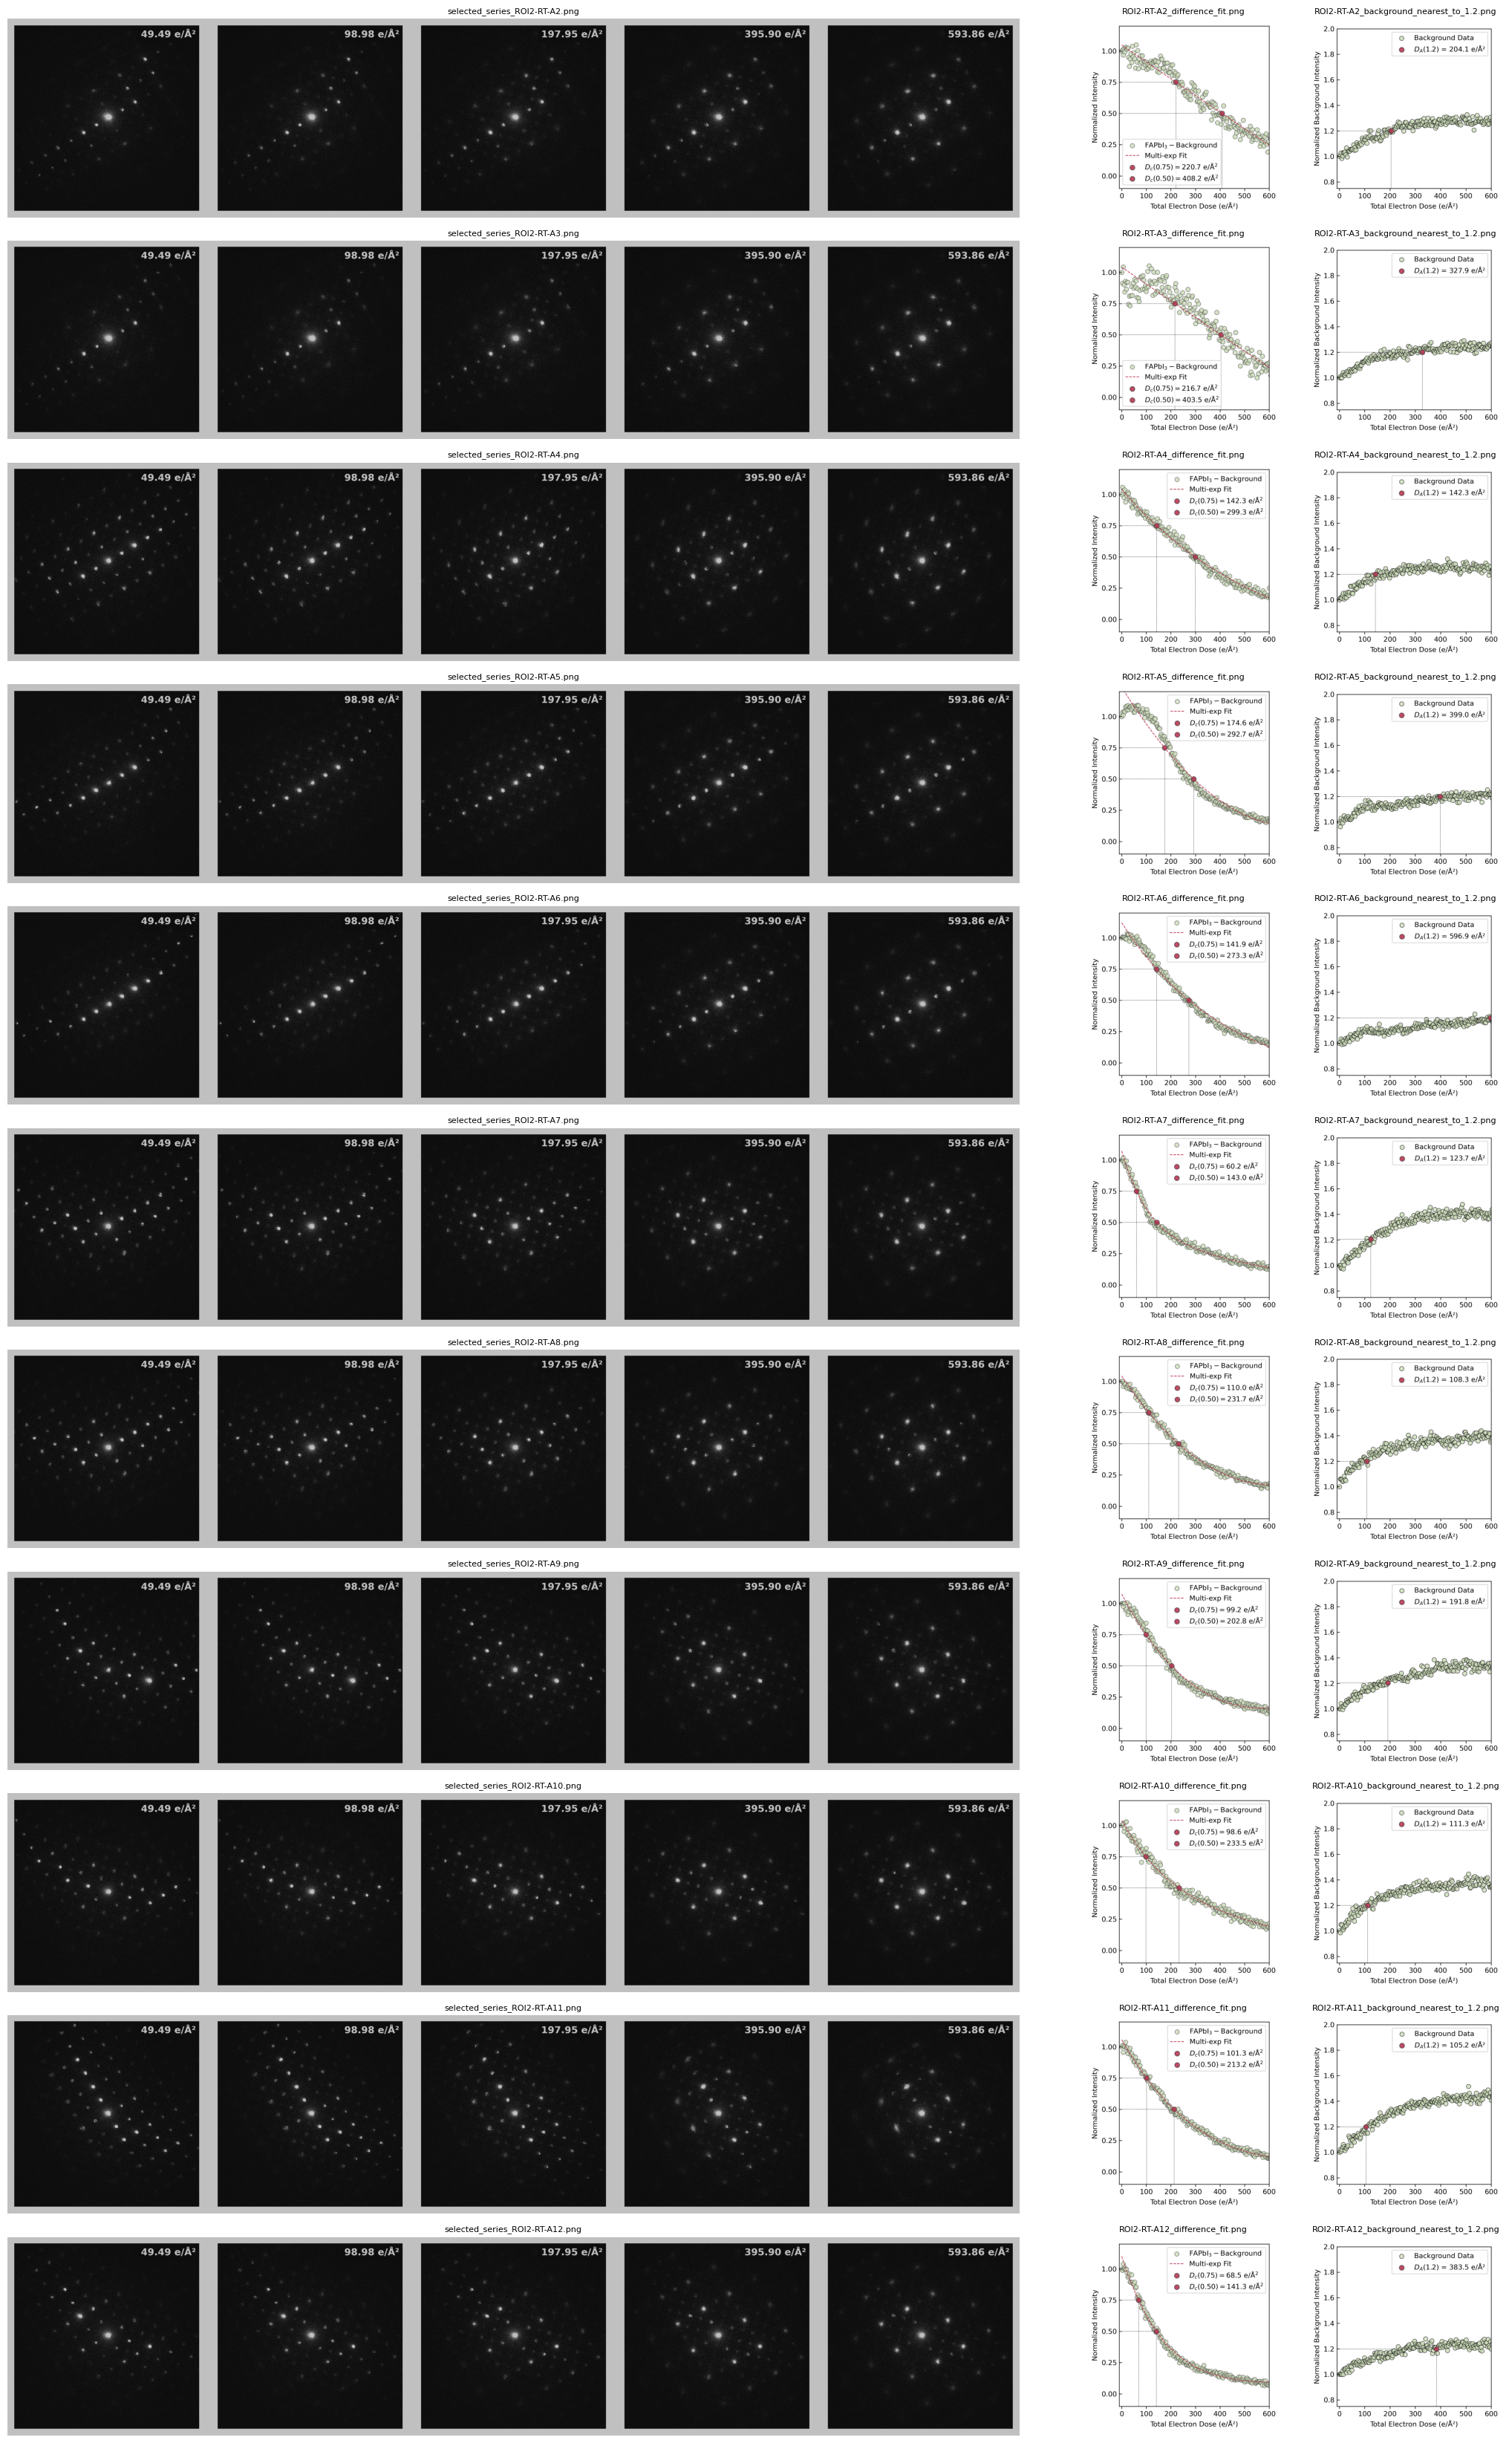

In [7]:
import os, re
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt

# — 보정 계수 필요하면 조정 —
brightness_factor = 1.3
contrast_factor   = 0.7

# — 경로 설정 —
base_dir = os.path.join(os.getcwd(), 'generated_notebooks')
sel_dir  = os.path.join(base_dir, 'DP_diffraction_series')
diff_dir = os.path.join(base_dir, 'Graphs_difference_collection')
bg_dir   = os.path.join(base_dir, 'Graphs_background_collections')

# — A숫자 순 정렬 유틸 —
def sorted_by_A(path, prefix=''):
    files = [f for f in os.listdir(path)
             if f.lower().endswith('.png') and f.startswith(prefix)]
    return sorted(files, key=lambda fn: int(re.search(r'A(\d+)', fn).group(1)))

sel_imgs  = sorted_by_A(sel_dir,  prefix='selected_series_')
diff_imgs = sorted_by_A(diff_dir)    # prefix='' 로 둬도 OK
bg_imgs   = sorted_by_A(bg_dir,    prefix='ROI2-RT-')

n = min(len(sel_imgs), len(diff_imgs), len(bg_imgs))
if n == 0:
    raise RuntimeError("이미지가 충분하지 않아요!")

# — 첫 번째 행 이미지 크기로 각 열의 가로∶세로 비율 계산 —
sample_dp   = Image.open(os.path.join(sel_dir, sel_imgs[0]))
sample_diff = Image.open(os.path.join(diff_dir, diff_imgs[0]))
sample_bg   = Image.open(os.path.join(bg_dir, bg_imgs[0]))

w1,h1 = sample_dp.size
w2,h2 = sample_diff.size
w3,h3 = sample_bg.size
width_ratios = [w1/h1, w2/h2, w3/h3]

# — 그리드 그리기 —
row_height = 3   # 각 행 높이(inch) 조절 가능
fig, axes = plt.subplots(
    n, 3,
    figsize=(sum(width_ratios)*row_height, n*row_height),
    gridspec_kw={'width_ratios': width_ratios}
)

for i in range(n):
    # 1) DP (Selected series) + 보정
    im = Image.open(os.path.join(sel_dir, sel_imgs[i]))
    im = ImageEnhance.Brightness(im).enhance(brightness_factor)
    im = ImageEnhance.Contrast(im).enhance(contrast_factor)
    ax = axes[i,0]
    ax.imshow(im)
    ax.set_title(sel_imgs[i], fontsize=8)
    ax.axis('off')

    # 2) Difference
    im2 = Image.open(os.path.join(diff_dir, diff_imgs[i]))
    ax = axes[i,1]
    ax.imshow(im2)
    ax.set_title(diff_imgs[i], fontsize=8)
    ax.axis('off')

    # 3) Background
    im3 = Image.open(os.path.join(bg_dir, bg_imgs[i]))
    ax = axes[i,2]
    ax.imshow(im3)
    ax.set_title(bg_imgs[i], fontsize=8)
    ax.axis('off')


plt.tight_layout()
plt.show()
